In [ ]:
!pip install --upgrade datasets
!rm -rf ~/.cache/huggingface/datasets

Ошибка загрузки: cannot identify image file <_io.BytesIO object at 0x7a7e043c5490>, пробуем другой источник...


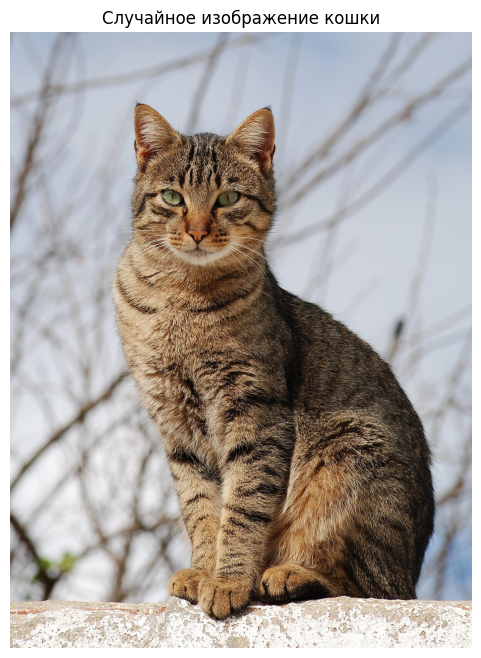

Предсказанный класс: tiger cat


In [ ]:
!pip install -q transformers torch pillow requests

from transformers import AutoImageProcessor, SwinForImageClassification
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import random
import time

# Инициализация модели и процессора
model = SwinForImageClassification.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224"
)
image_processor = AutoImageProcessor.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224"
)

def get_random_cat_image():
    """Загружает случайное изображение кошки с различных API"""
    sources = [
        # Случайные картинки
        lambda: requests.get("https://cataas.com/cat", timeout=10).content,

        lambda: requests.get("https://api.thecatapi.com/v1/images/search", timeout=10).json()[0]['url'],

        lambda: requests.get(f"https://placekitten.com/{random.randint(300, 800)}/{random.randint(300, 800)}", timeout=10).content,

        lambda: requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg", timeout=10).content
    ]

    for source in random.sample(sources, len(sources)):
        try:
            if callable(source):
                content = source()
                if isinstance(content, str):  # Если получили URL
                    content = requests.get(content, timeout=10).content
                return Image.open(BytesIO(content))
        except Exception as e:
            print(f"Ошибка загрузки: {e}, пробуем другой источник...")
            time.sleep(1)


    from PIL import ImageDraw
    img = Image.new('RGB', (224, 224), color=(73, 109, 137))
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), "Random Cat Placeholder", fill=(255, 255, 0))
    return img

# Загрузка случайного изображения кошки
image = get_random_cat_image()

# Отображение изображения
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title("Случайное изображение кошки")
plt.show()

# Обработка и предсказание
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_label_id = logits.argmax(-1).item()
predicted_label_text = model.config.id2label[predicted_label_id]

print(f"Предсказанный класс: {predicted_label_text}")